In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv("weather.csv")
# Display the DataFrame
data

,Created At,Temperature,Humidity,Rain,Light,Air Quality
0,2023-11-07T05:23:51Z,26.7,53,1019,64,0.13
1,2023-11-07T05:24:35Z,26.2,54,1019,68,0.13
2,2023-11-07T05:24:35Z,26.2,54,1019,68,0.13
3,2023-11-07T05:24:35Z,26.2,54,1019,68,0.13
4,2023-11-07T05:24:35Z,26.2,54,1019,68,0.13
...,...,...,...,...,...,...
391,2023-11-07T05:58:24Z,24.8,57,1018,54,0.13
392,2023-11-07T05:58:24Z,24.8,57,1018,54,0.13
393,2023-11-07T05:58:24Z,24.8,57,1018,54,0.13
394,2023-11-07T05:58:24Z,24.8,57,1018,54,0.13


In [5]:
# Lựa chọn các cột số cần chuẩn hóa
numeric_columns = ["Temperature", "Humidity", "Rain", "Light", "Air Quality"]
data_to_normalize = data[numeric_columns]

# Chuẩn hóa các cột số
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data_to_normalize)

# Hiển thị dữ liệu sau khi chuẩn hóa
print(data.head(11))


              Created At  Temperature  Humidity  Rain     Light  Air Quality
0   2023-11-07T05:23:51Z     1.000000      0.00   1.0  0.783784          0.7
1   2023-11-07T05:24:35Z     0.736842      0.25   1.0  0.891892          0.7
2   2023-11-07T05:24:35Z     0.736842      0.25   1.0  0.891892          0.7
3   2023-11-07T05:24:35Z     0.736842      0.25   1.0  0.891892          0.7
4   2023-11-07T05:24:35Z     0.736842      0.25   1.0  0.891892          0.7
5   2023-11-07T05:24:35Z     0.736842      0.25   1.0  0.891892          0.7
6   2023-11-07T05:24:35Z     0.736842      0.25   1.0  0.891892          0.7
7   2023-11-07T05:25:05Z     0.736842      0.25   1.0  0.000000          0.0
8   2023-11-07T05:25:05Z     0.736842      0.25   1.0  0.000000          0.0
9   2023-11-07T05:25:21Z     0.736842      0.75   1.0  0.540541          1.0
10  2023-11-07T05:25:21Z     0.736842      0.75   1.0  0.540541          1.0


In [6]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data[["Humidity", "Rain", "Light", "Air Quality"]]
y = data["Temperature"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán nhiệt độ trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.020303934667043066
R-squared: 0.6476069482588038


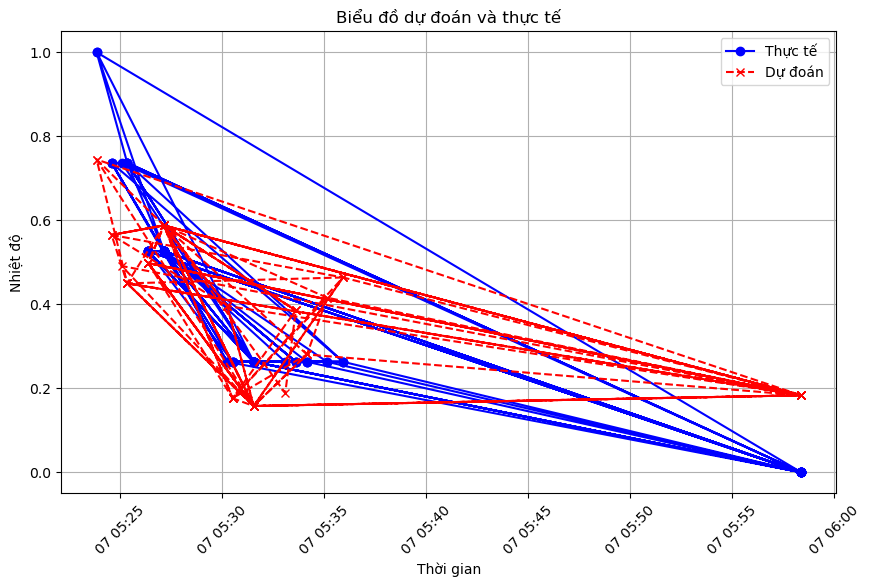

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Chuyển cột "Created At" sang định dạng thời gian
data["Created At"] = pd.to_datetime(data["Created At"])

# Sắp xếp lại dữ liệu theo thời gian (nếu chưa được sắp xếp)
data = data.sort_values(by="Created At")

# Tạo một danh sách các chỉ số cho mẫu trong tập kiểm tra
indices = X_test.index

# Lấy mẫu thời gian tương ứng với tập kiểm tra
x = data.loc[indices, "Created At"]
y_test = list(y_test)
y_pred = list(y_pred)

# Vẽ biểu đồ dự đoán và thực tế dưới dạng đường
plt.figure(figsize=(10, 6))
plt.plot(x, y_test, label="Thực tế", marker='o', linestyle='-', color='b')
plt.plot(x, y_pred, label="Dự đoán", marker='x', linestyle='--', color='r')
plt.xlabel("Thời gian")
plt.ylabel("Nhiệt độ")
plt.title("Biểu đồ dự đoán và thực tế")
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Xoay nhãn trục x để hiển thị thời gian dễ đọc
plt.show()


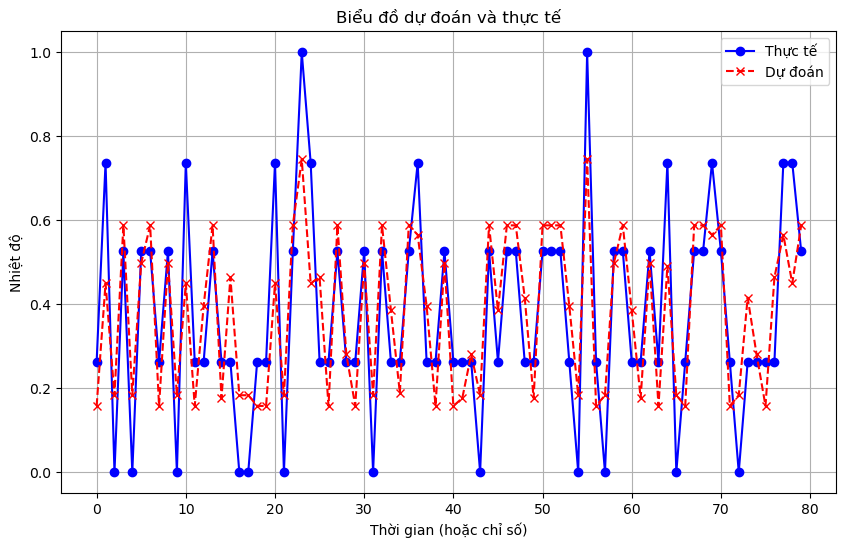

In [30]:
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu để vẽ
x = range(len(y_test))  # Xác định trục x, có thể sử dụng thời gian hoặc chỉ số của dữ liệu
y_test = list(y_test)  # Chuyển dữ liệu thực tế sang danh sách
y_pred = list(y_pred)  # Chuyển dữ liệu dự đoán sang danh sách

# Vẽ biểu đồ dự đoán và thực tế dưới dạng đường
plt.figure(figsize=(10, 6))
plt.plot(x, y_test, label="Thực tế", marker='o', linestyle='-', color='b')
plt.plot(x, y_pred, label="Dự đoán", marker='x', linestyle='--', color='r')
plt.xlabel("Thời gian (hoặc chỉ số)")
plt.ylabel("Nhiệt độ")
plt.title("Biểu đồ dự đoán và thực tế")
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


In [18]:
# Cahuẩn bị dữ liệu
X = data[["Temperature", "Humidity", "Rain", "Light", "Air Quality"]]
y = data["Temperature"]  # Đây là cột chứa nhiệt độ sau 30 phút

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện m
# ô hình Random Forest Regression
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán nhiệt độ 30 phút sau trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Hiển thị kết quả
print("Kết quả dự đoán nhiệt độ 30 phút sau:")
print(y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Kết quả dự đoán nhiệt độ 30 phút sau:
[0.26315789 0.73684211 0.         0.52631579 0.         0.52631579
 0.52631579 0.26315789 0.52631579 0.         0.73684211 0.26315789
 0.26315789 0.52631579 0.26315789 0.26315789 0.         0.
 0.26315789 0.26315789 0.73684211 0.         0.52631579 0.89210526
 0.73684211 0.26315789 0.26315789 0.52631579 0.26315789 0.26315789
 0.52631579 0.         0.52631579 0.26315789 0.26315789 0.52631579
 0.73684211 0.26315789 0.26315789 0.52631579 0.26315789 0.26315789
 0.26315789 0.         0.52631579 0.26315789 0.52631579 0.52631579
 0.26315789 0.26315789 0.52631579 0.52631579 0.52631579 0.26315789
 0.         0.89210526 0.26315789 0.         0.52631579 0.52631579
 0.26315789 0.26315789 0.52631579 0.26315789 0.73684211 0.
 0.26315789 0.52631579 0.52631579 0.73684211 0.52631579 0.26315789
 0.         0.26315789 0.26315789 0.26315789 0.26315789 0.73684211
 0.73684211 0.52631579]
Mean Squared Error: 0.0002910318559556829
R-squared: 0.9949488803251225


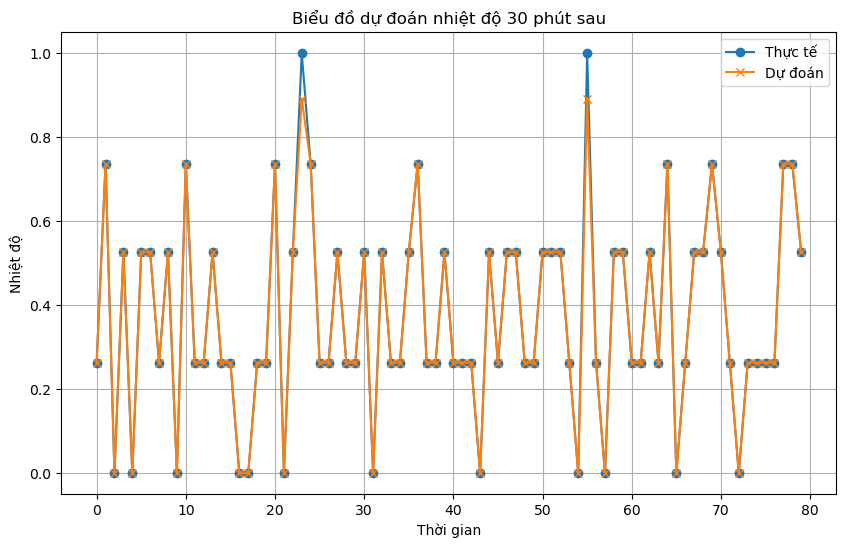

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Thực tế', marker='o')
plt.plot(y_pred, label='Dự đoán', marker='x')
plt.xlabel('Thời gian')
plt.ylabel('Nhiệt độ')
plt.title('Biểu đồ dự đoán nhiệt độ 30 phút sau')
plt.legend()
plt.grid()
plt.show()